# Scaling

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Scaling : Transform data numerik/kolom2 ke dalam range/interval yang sama.

1. Minmax Scaler
1. Standard Scaler
1. Robust Scaler

In [130]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_52295/3689212605.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['tip'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_52295/3689212605.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(tips['total_bill'])


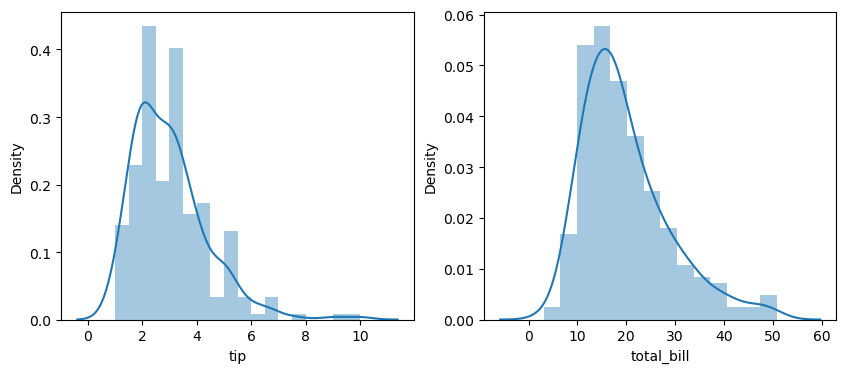

In [136]:
#tip , total bill
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(tips['tip'])
plt.subplot(1,2,2)
sns.distplot(tips['total_bill'])
plt.show()

In [137]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [138]:
#library scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [139]:
X=tips[['tip','total_bill']]

> ## MinMax

Transform fitur/variabel ke dalam range 0-1

\begin{align}
z_i=\frac{x_i-min(x_i)}{max(x_i)-min(x_i)}
\end{align}

In [142]:
#define scaler
minmax=MinMaxScaler()
#fit
X_minmax=minmax.fit_transform(X)
#buat dalam bentuk dataframe
X_minmax=pd.DataFrame(X_minmax,columns=['tip','total_bill'])
X_minmax

,tip,total_bill
0,0.001111,0.291579
1,0.073333,0.152283
2,0.277778,0.375786
3,0.256667,0.431713
4,0.290000,0.450775
...,...,...
239,0.546667,0.543779
240,0.111111,0.505027
241,0.111111,0.410557
242,0.083333,0.308965


In [143]:
X_minmax.describe()

,tip,total_bill
count,244.000000,244.000000
mean,0.222031,0.350145
std,0.153738,0.186477
min,0.000000,0.000000
25%,0.111111,0.215281
50%,0.211111,0.308442
75%,0.284722,0.441087
max,1.000000,1.000000


/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_52295/3064665409.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_minmax['tip'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_52295/3064665409.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_minmax['total_bill'])

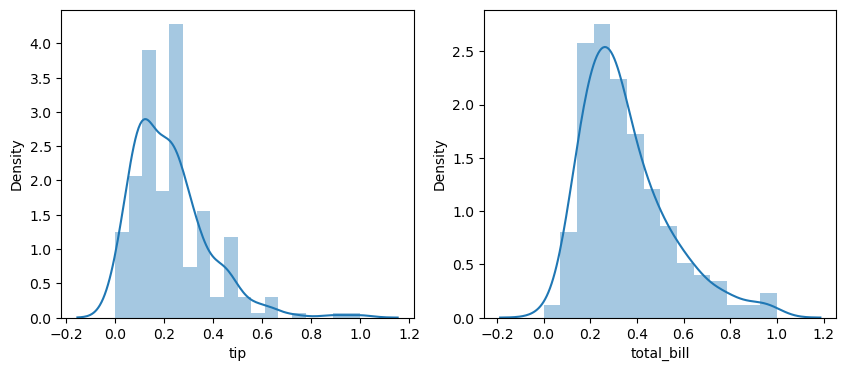

In [145]:
#tip , total bill
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_minmax['tip'])
plt.subplot(1,2,2)
sns.distplot(X_minmax['total_bill'])
plt.show()

> ## StandardScaler

Transform fitur/variabel numerik menjadi: mean=0, stdar deviasi =1 

\begin{align}
z_i=\frac{x_i-\bar{x}}{s}
\end{align}

In [146]:
#define scaler
standard=StandardScaler()
#fit
X_standard=standard.fit_transform(X)
#buat ke dalam dataframe
X_standard=pd.DataFrame(X_standard,columns=['tip','total_bill'])
X_standard

,tip,total_bill
0,-1.439947,-0.314711
1,-0.969205,-1.063235
2,0.363356,0.137780
3,0.225754,0.438315
4,0.443020,0.540745
...,...,...
239,2.115963,1.040511
240,-0.722971,0.832275
241,-0.722971,0.324630
242,-0.904026,-0.221287


In [147]:
X_standard.describe()

,tip,total_bill
count,2.440000e+02,2.440000e+02
mean,2.839259e-16,-7.871663e-17
std,1.002056e+00,1.002056e+00
min,-1.447189e+00,-1.881547e+00
25%,-7.229713e-01,-7.247111e-01
50%,-7.117518e-02,-2.241005e-01
75%,4.086192e-01,4.886857e-01
max,5.070772e+00,3.492068e+00


/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_52295/2246269356.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_standard['tip'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_52295/2246269356.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_standard['total_bil

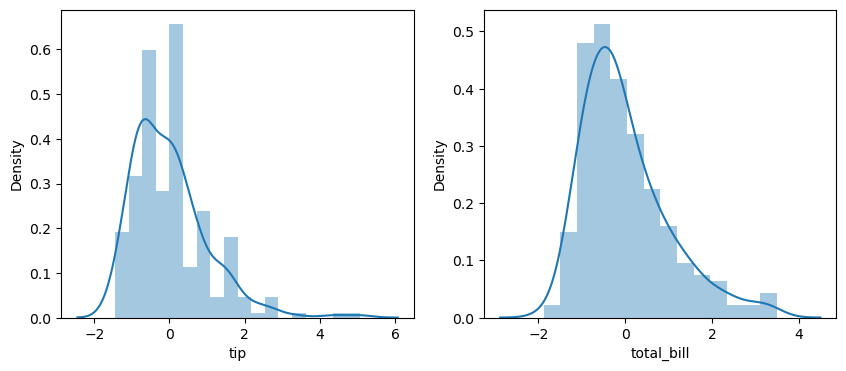

In [148]:
#tip , total bill
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_standard['tip'])
plt.subplot(1,2,2)
sns.distplot(X_standard['total_bill'])
plt.show()

> ## RobustScaler

Transform fitur/variabel numerik menjadi range yang menjadi range yang lebih kecil

\begin{align}
z_i=\frac{x_i-Q_1(x_i)}{Q_3(x_i)-Q_1(x_i)}
\end{align}

In [149]:
#define scaler
robust=RobustScaler()
#fit
X_robust=robust.fit_transform(X)
#buat ke dalam dataframe
X_robust=pd.DataFrame(X_robust,columns=['tip','total_bill'])
X_robust

,tip,total_bill
0,-1.2096,-0.074675
1,-0.7936,-0.691558
2,0.3840,0.298237
3,0.2624,0.545918
4,0.4544,0.630334
...,...,...
239,1.9328,1.042208
240,-0.5760,0.870594
241,-0.5760,0.452226
242,-0.7360,0.002319


In [150]:
X_robust.describe()

,tip,total_bill
count,244.000000,2.440000e+02
mean,0.062898,1.846886e-01
std,0.885528,8.258267e-01
min,-1.216000,-1.365955e+00
25%,-0.576000,-4.125696e-01
50%,0.000000,-1.647987e-16
75%,0.424000,5.874304e-01
max,4.544000,3.062616e+00


/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_52295/3309024468.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_robust['tip'])
/var/folders/jt/r23kbqhx1q5ggqjrcs67nrvh0000gn/T/ipykernel_52295/3309024468.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_robust['total_bill'])

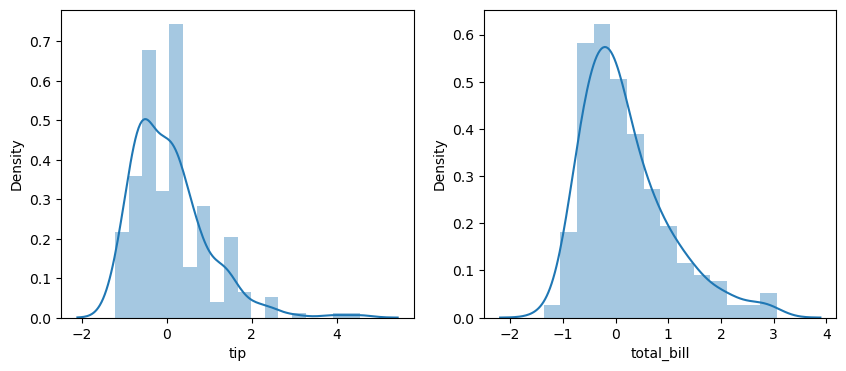

In [151]:
#tip , total bill
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.distplot(X_robust['tip'])
plt.subplot(1,2,2)
sns.distplot(X_robust['total_bill'])
plt.show()

# Encoding

> ## Pandas Get Dummies 

In [153]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [160]:
for i in ['sex','smoker','day','time']:
    print(tips[i].value_counts())

sex
Male      157
Female     87
Name: count, dtype: int64
smoker
No     151
Yes     93
Name: count, dtype: int64
day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64
time
Dinner    176
Lunch      68
Name: count, dtype: int64


In [165]:
tips_dummy=pd.get_dummies(tips,columns=['sex','smoker','day','time'], dtype=int)
tips_dummy

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


> ## One Hot Encoding

In [166]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [167]:
#define encoder
transformer=ColumnTransformer([
    ('encoder',OneHotEncoder(),['sex','smoker','day','time'])
])

In [174]:
#encoding
tips_encoded=transformer.fit_transform(tips)
#buat ke data frame
tips_encoded=pd.DataFrame(tips_encoded)
#convert dari float ke int
tips_encoded=tips_encoded.astype(int)
#ganti nama kolom
tips_encoded.columns=transformer.get_feature_names_out()
#gabungin dengan data yang lama
tips_encoded=pd.concat([tips[['total_bill','tip','size']],tips_encoded],axis=1)
tips_encoded

,total_bill,tip,size,encoder__sex_Female,encoder__sex_Male,encoder__smoker_No,encoder__smoker_Yes,encoder__day_Fri,encoder__day_Sat,encoder__day_Sun,encoder__day_Thur,encoder__time_Dinner,encoder__time_Lunch
0,16.99,1.01,2,1,0,1,0,0,0,1,0,1,0
1,10.34,1.66,3,0,1,1,0,0,0,1,0,1,0
2,21.01,3.50,3,0,1,1,0,0,0,1,0,1,0
3,23.68,3.31,2,0,1,1,0,0,0,1,0,1,0
4,24.59,3.61,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,1,0,0,1,0,0,1,0
240,27.18,2.00,2,1,0,0,1,0,1,0,0,1,0
241,22.67,2.00,2,0,1,0,1,0,1,0,0,1,0
242,17.82,1.75,2,0,1,1,0,0,1,0,0,1,0


In [170]:
transformer.get_feature_names_out()

array(['encoder__sex_Female', 'encoder__sex_Male', 'encoder__smoker_No',
       'encoder__smoker_Yes', 'encoder__day_Fri', 'encoder__day_Sat',
       'encoder__day_Sun', 'encoder__day_Thur', 'encoder__time_Dinner',
       'encoder__time_Lunch'], dtype=object)

> ## Ordinal Encoding .map

In [202]:
tips_ordinal_encoded=tips.copy()

In [203]:
tips_ordinal_encoded['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [204]:
#encoding with .map
tips_ordinal_encoded['day']=tips_ordinal_encoded['day'].map({'Thur':1,'Fri':2,'Sat':3,'Sun':4})
tips_ordinal_encoded

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,4,Dinner,2
1,10.34,1.66,Male,No,4,Dinner,3
2,21.01,3.50,Male,No,4,Dinner,3
3,23.68,3.31,Male,No,4,Dinner,2
4,24.59,3.61,Female,No,4,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,3,Dinner,3
240,27.18,2.00,Female,Yes,3,Dinner,2
241,22.67,2.00,Male,Yes,3,Dinner,2
242,17.82,1.75,Male,No,3,Dinner,2


> ## Ordinal Encoding category_encoders library

In [187]:
!pip install category_encoders


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [194]:
import category_encoders as ce

In [205]:
#create encoder
ordinal_mapping=[
    {'col':'day',
    'mapping':{'Thur':1,'Fri':2,'Sat':3,'Sun':4}}
]

ordinal_encoder=ce.OrdinalEncoder(cols='day',mapping=ordinal_mapping)

#fit_transform
df_ord=ordinal_encoder.fit_transform(tips['day'])
df_ord

,day
0,4
1,4
2,4
3,4
4,4
...,...
239,3
240,3
241,3
242,3


In [209]:
tips_ordinal_encoded=pd.concat([tips[['total_bill','tip','size','time','smoker','sex']],df_ord],axis=1)
tips_ordinal_encoded

,total_bill,tip,size,time,smoker,sex,day
0,16.99,1.01,2,Dinner,No,Female,4
1,10.34,1.66,3,Dinner,No,Male,4
2,21.01,3.50,3,Dinner,No,Male,4
3,23.68,3.31,2,Dinner,No,Male,4
4,24.59,3.61,4,Dinner,No,Female,4
...,...,...,...,...,...,...,...
239,29.03,5.92,3,Dinner,No,Male,3
240,27.18,2.00,2,Dinner,Yes,Female,3
241,22.67,2.00,2,Dinner,Yes,Male,3
242,17.82,1.75,2,Dinner,No,Male,3


In [210]:
tips['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [211]:
#create encoder
ordinal_mapping=[
    {'col':'day',
    'mapping':{'Thur':1,'Fri':2,'Sat':3,'Sun':4}},
    {'col':'time',
    'mapping':{'Dinner':1,'Lunch':2}},
]

ordinal_encoder=ce.OrdinalEncoder(cols=['day','time'],mapping=ordinal_mapping)

#fit_transform
df_ord=ordinal_encoder.fit_transform(tips[['day','time']])
df_ord

,day,time
0,4,1
1,4,1
2,4,1
3,4,1
4,4,1
...,...,...
239,3,1
240,3,1
241,3,1
242,3,1


In [212]:
tips_ordinal_encoded=pd.concat([tips[['total_bill','tip','size','smoker','sex']],df_ord],axis=1)
tips_ordinal_encoded

,total_bill,tip,size,smoker,sex,day,time
0,16.99,1.01,2,No,Female,4,1
1,10.34,1.66,3,No,Male,4,1
2,21.01,3.50,3,No,Male,4,1
3,23.68,3.31,2,No,Male,4,1
4,24.59,3.61,4,No,Female,4,1
...,...,...,...,...,...,...,...
239,29.03,5.92,3,No,Male,3,1
240,27.18,2.00,2,Yes,Female,3,1
241,22.67,2.00,2,Yes,Male,3,1
242,17.82,1.75,2,No,Male,3,1


> ## Binary Encoding

In [214]:
binary_encoder=ce.BinaryEncoder(cols=['day'])
df_bin=binary_encoder.fit_transform(tips['day'])
df_bin

,day_0,day_1,day_2
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
239,0,1,0
240,0,1,0
241,0,1,0
242,0,1,0


In [215]:
tips_binary_encoded=pd.concat([tips[['total_bill','tip','size','smoker','sex']],df_bin],axis=1)
tips_binary_encoded

,total_bill,tip,size,smoker,sex,day_0,day_1,day_2
0,16.99,1.01,2,No,Female,0,0,1
1,10.34,1.66,3,No,Male,0,0,1
2,21.01,3.50,3,No,Male,0,0,1
3,23.68,3.31,2,No,Male,0,0,1
4,24.59,3.61,4,No,Female,0,0,1
...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,No,Male,0,1,0
240,27.18,2.00,2,Yes,Female,0,1,0
241,22.67,2.00,2,Yes,Male,0,1,0
242,17.82,1.75,2,No,Male,0,1,0


# Apply Several Preprocessing Method to Modeling at once Part 1a : Ridge

> ## Table Of Contents

1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

> ## Data

In [216]:
from sklearn.model_selection import train_test_split #split data
from sklearn.linear_model import Ridge #ML
from sklearn.metrics import mean_squared_error #metrics

In [217]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ## Preprocessing

preprocessing schema:
1. one hot encoding: sex, smoker, time 
1. binary encoding: day
1. robust scaler: total_bill
1. no treatment: size

In [258]:
transformer=ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('binary encoder', ce.BinaryEncoder(),['day']),
    ('robust scaler', RobustScaler(),['total_bill'])
], remainder='passthrough')

> ## Data Splitting

In [259]:
X=tips[['sex','smoker','time','day','total_bill','size']]
y=tips['tip']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3
                                                    , random_state=10)

> ## Data Transform

In [261]:
X_train.head()

,sex,smoker,time,day,total_bill,size
39,Male,No,Dinner,Sat,31.27,3
87,Male,No,Lunch,Thur,18.28,2
169,Female,Yes,Dinner,Sat,10.63,2
232,Male,No,Dinner,Sat,11.61,2
144,Female,No,Lunch,Thur,16.43,2


In [262]:
#preprocessing fit-transform untuk data train, transform untuk data test 
X_train_preprocessed=transformer.fit_transform(X_train)
X_test_preprocessed=transformer.transform(X_test)

In [263]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)
X_train_preprocessed.head()

,0,1,2,3,4,5,6,7
0,1.0,0.0,0.0,0.0,0.0,1.0,1.260554,3.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.081253,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,-0.613255,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,-0.524285,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,-0.086700,2.0


In [264]:
transformer.transformers_

[('one hot encoder', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary encoder',
  BinaryEncoder(cols=['day'],
                mapping=[{'col': 'day',
                          'mapping':     day_0  day_1  day_2
   1      0      0      1
   2      0      1      0
   3      0      1      1
   4      1      0      0
  -1      0      0      0
  -2      0      0      0}]),
  ['day']),
 ('robust scaler', RobustScaler(), ['total_bill']),
 ('remainder', 'passthrough', [5])]

In [265]:
transformer.transformers_[0][2]

['sex', 'smoker', 'time']

In [266]:
transformer.transformers_[0][1].get_feature_names_out()

array(['sex_Male', 'smoker_Yes', 'time_Lunch'], dtype=object)

In [267]:
transformer.transformers_[1][1].get_feature_names_out()

array(['day_0', 'day_1', 'day_2'], dtype=object)

In [268]:
transformer.transformers_[2][1].get_feature_names_out()

array(['total_bill'], dtype=object)

In [269]:
features=list(transformer.transformers_[0][1].get_feature_names_out())+list(transformer.transformers_[1][1].get_feature_names_out())+['total_bill','size']
X_train_preprocessed.columns=features
X_test_preprocessed.columns=features
X_train_preprocessed

,sex_Male,smoker_Yes,time_Lunch,day_0,day_1,day_2,total_bill,size
0,1.0,0.0,0.0,0.0,0.0,1.0,1.260554,3.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.081253,2.0
2,0.0,1.0,0.0,0.0,0.0,1.0,-0.613255,2.0
3,1.0,0.0,0.0,0.0,0.0,1.0,-0.524285,2.0
4,0.0,0.0,1.0,0.0,1.0,0.0,-0.086700,2.0
...,...,...,...,...,...,...,...,...
165,1.0,0.0,0.0,0.0,0.0,1.0,0.018611,3.0
166,1.0,0.0,0.0,0.0,1.0,1.0,0.380844,2.0
167,1.0,0.0,0.0,0.0,0.0,1.0,-0.372674,2.0
168,0.0,0.0,1.0,0.0,1.0,0.0,1.127099,6.0


> ## Model Fitting and evaluation

In [271]:
#define model
model=Ridge()
#fit model
model.fit(X_train_preprocessed,y_train)

Ridge()

In [272]:
y_pred=model.predict(X_test_preprocessed)
print('mse :',mean_squared_error(y_test,y_pred))

mse : 1.0290925846942338


> ## Model Properties

In [273]:
coef_table=pd.DataFrame(
{'features':features,'coef':model.coef_})
coef_table

,features,coef
0,sex_Male,-0.143779
1,smoker_Yes,-0.135949
2,time_Lunch,0.140186
3,day_0,0.163201
4,day_1,0.026447
5,day_2,0.066672
6,total_bill,1.169090
7,size,0.125055


# Apply Several Preprocessing Method to Modeling at once Part 1b : Tree

> ## Table Of Contents

1. data
1. preprocessing
1. data splitting
1. data transform
1. model fitting and evaluation
1. model properties

> ## Data

In [274]:
from sklearn.tree import DecisionTreeRegressor, plot_tree #ML model

In [275]:
tips=sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


> ## Preprocessing

preprocessing v1:
1. one hot encoding: sex, smoker, time 
1. ordinal encoding: day
1. no treatment: size,total_bill

In [276]:
ordinal_mapping=[
    {'col':'day',
    'mapping':{'Thur':1,'Fri':2,'Sat':3,'Sun':4}}
]

ordinal_encoder=ce.OrdinalEncoder(cols='day',mapping=ordinal_mapping)


In [277]:
transformer=ColumnTransformer([
    ('one hot encoder', OneHotEncoder(drop='first'),['sex','smoker','time']),
    ('ordinal encoder', ordinal_encoder,['day'])
], remainder='passthrough')

> ## Data Splitting

In [278]:
X=tips[['sex','smoker','time','day','total_bill','size']]
y=tips['tip']

In [279]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3
                                                    , random_state=10)

> ## Data Transform

In [280]:
X_train.head()

,sex,smoker,time,day,total_bill,size
39,Male,No,Dinner,Sat,31.27,3
87,Male,No,Lunch,Thur,18.28,2
169,Female,Yes,Dinner,Sat,10.63,2
232,Male,No,Dinner,Sat,11.61,2
144,Female,No,Lunch,Thur,16.43,2


In [281]:
#preprocessing fit-transform untuk data train, transform untuk data test 
X_train_preprocessed=transformer.fit_transform(X_train)
X_test_preprocessed=transformer.transform(X_test)

In [282]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)
X_train_preprocessed.head()

,0,1,2,3,4,5
0,1.0,0.0,0.0,3.0,31.27,3.0
1,1.0,0.0,1.0,1.0,18.28,2.0
2,0.0,1.0,0.0,3.0,10.63,2.0
3,1.0,0.0,0.0,3.0,11.61,2.0
4,0.0,0.0,1.0,1.0,16.43,2.0


In [283]:
transformer.transformers_

[('one hot encoder', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('ordinal encoder',
  OrdinalEncoder(cols=['day'],
                 mapping=[{'col': 'day', 'data_type': dtype('O'),
                           'mapping': Thur    1
  Fri     2
  Sat     3
  Sun     4
  dtype: int64}]),
  ['day']),
 ('remainder', 'passthrough', [4, 5])]

In [285]:
transformer.transformers_[0][1].get_feature_names_out()

array(['sex_Male', 'smoker_Yes', 'time_Lunch'], dtype=object)

In [286]:
transformer.transformers_[1][1].get_feature_names_out()

array(['day'], dtype=object)

In [288]:
features=list(transformer.transformers_[0][1].get_feature_names_out())+list(transformer.transformers_[1][1].get_feature_names_out())+['total_bill','size']
X_train_preprocessed.columns=features
X_test_preprocessed.columns=features
X_train_preprocessed

,sex_Male,smoker_Yes,time_Lunch,day,total_bill,size
0,1.0,0.0,0.0,3.0,31.27,3.0
1,1.0,0.0,1.0,1.0,18.28,2.0
2,0.0,1.0,0.0,3.0,10.63,2.0
3,1.0,0.0,0.0,3.0,11.61,2.0
4,0.0,0.0,1.0,1.0,16.43,2.0
...,...,...,...,...,...,...
165,1.0,0.0,0.0,3.0,17.59,3.0
166,1.0,0.0,0.0,4.0,21.58,2.0
167,1.0,0.0,0.0,3.0,13.28,2.0
168,0.0,0.0,1.0,1.0,29.80,6.0


> ## Model Fitting and evaluation

In [289]:
#define model
model=DecisionTreeRegressor(max_depth=3)
#fit model
model.fit(X_train_preprocessed,y_train)

DecisionTreeRegressor(max_depth=3)

In [290]:
y_pred=model.predict(X_test_preprocessed)
print('mse :',mean_squared_error(y_test,y_pred))

mse : 0.8292584375206998


> ## Model Properties

In [295]:
importance_table=pd.DataFrame(
{'features':features,'importance':model.feature_importances_})
importance_table

,features,importance
0,sex_Male,0.000000
1,smoker_Yes,0.101052
2,time_Lunch,0.000000
3,day,0.000000
4,total_bill,0.898948
5,size,0.000000


<Axes: >

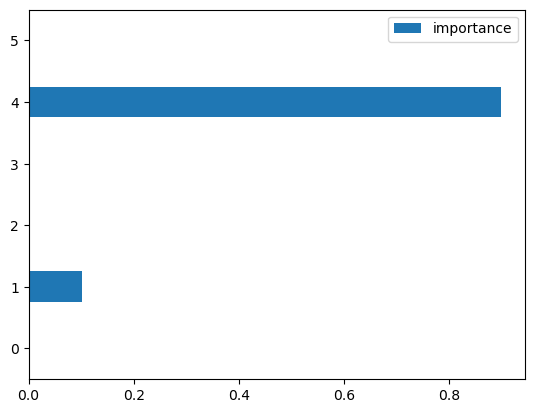

In [296]:
importance_table.plot(kind='barh')

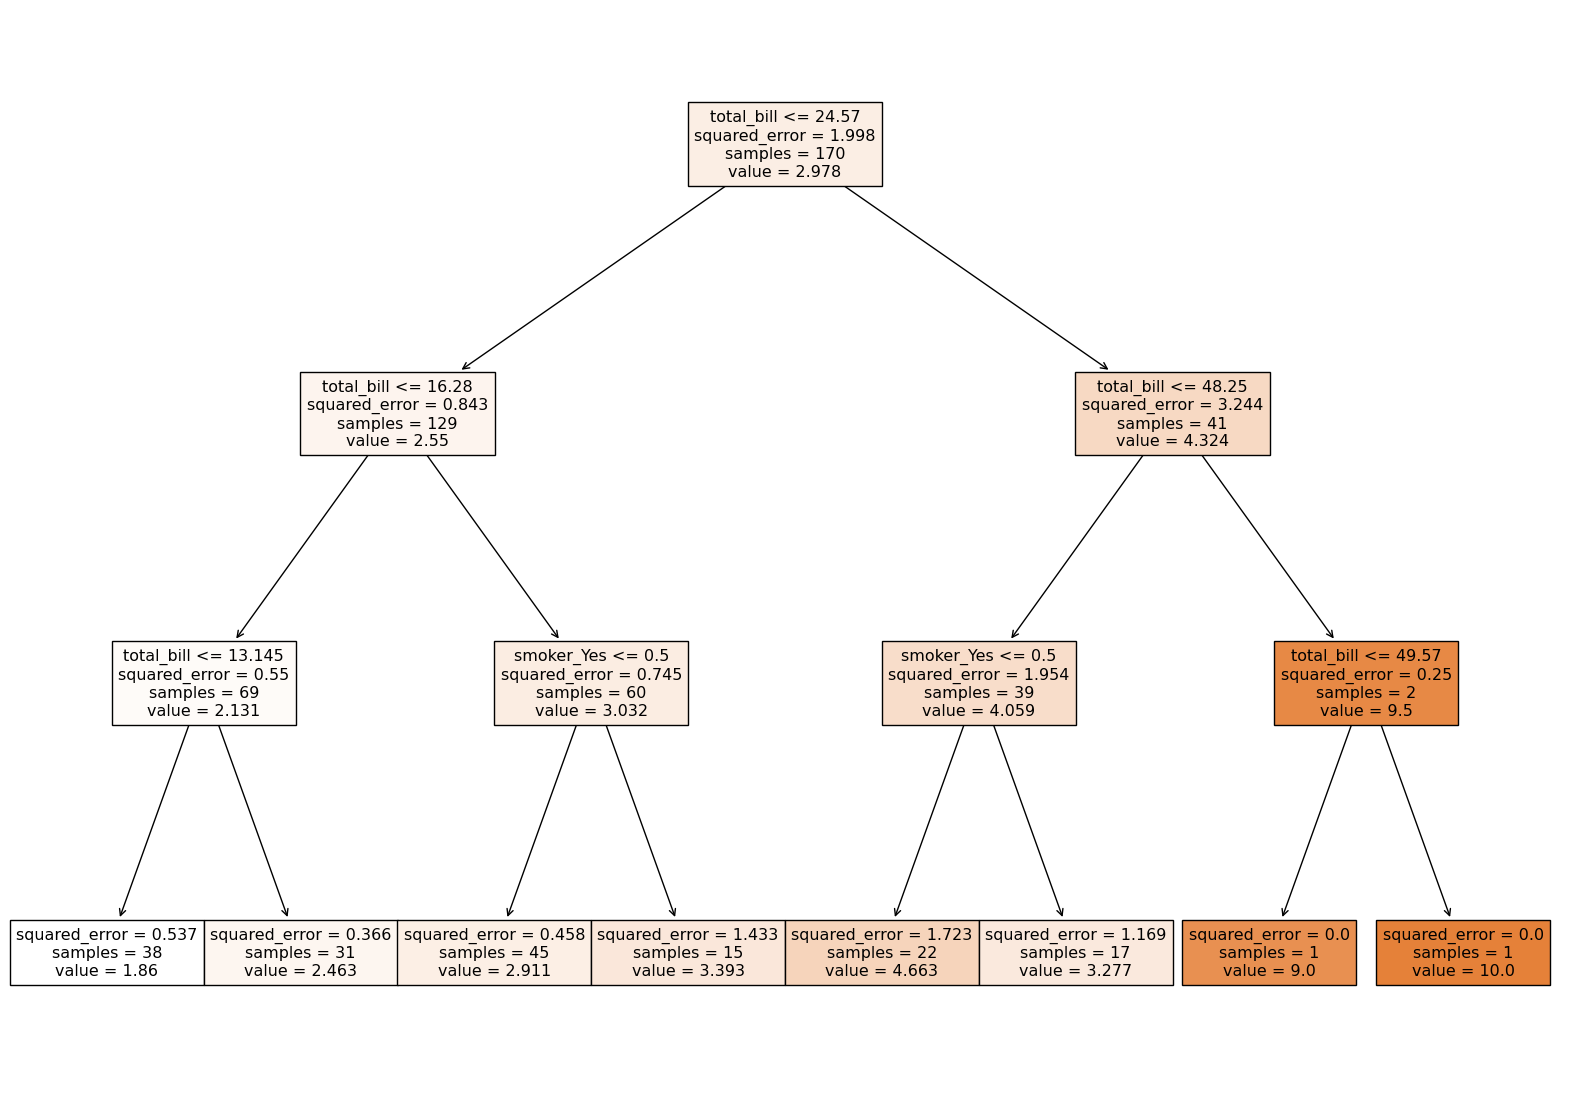

In [298]:
plt.figure(figsize=(20,14))
plot_tree(model,feature_names=features,filled=True)
plt.show()

# Missing Value

> ## Simple Imputer

In [299]:
from sklearn.impute import SimpleImputer

In [318]:
df=pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


In [314]:
#impute with mean
imp_num=SimpleImputer(strategy='mean')
df[['x1', 'x2','x3']]=imp_num.fit_transform(df[['x1', 'x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


In [315]:
#impute with median
imp_num=SimpleImputer(strategy='median')
df[['x1', 'x2','x3']]=imp_num.fit_transform(df[['x1', 'x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


In [316]:
#impute with mean
imp_mode=SimpleImputer(strategy='most_frequent')
df[['x4', 'x5','x6']]=imp_mode.fit_transform(df[['x4', 'x5','x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,M
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,M


In [319]:
#impute with mean
imp_mode=SimpleImputer(strategy='constant',fill_value='P')
df[['x6']]=imp_mode.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,P
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,P


In [303]:
df.columns

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')

> ## Iterative Imputer

In [320]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [321]:
df=pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


In [322]:
imp_iter=IterativeImputer(max_iter=10)
df[['x1', 'x2','x3']]=imp_iter.fit_transform(df[['x1', 'x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.000000,3.000000,10.0,A,X,M
1,5.000000,5.000000,11.0,A,Y,M
2,6.202755,6.000000,12.0,C,X,NaN
3,6.000000,5.000000,9.0,C,X,M
4,7.000000,4.705522,8.0,D,NaN,N
5,9.000000,5.000000,11.0,NaN,Y,NaN


> ##  Nearest Neighbour Imputer

In [324]:
from sklearn.impute import KNNImputer

In [329]:
df=pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
})
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


In [332]:
imp_knn=KNNImputer(n_neighbors=5)
df[['x1', 'x2','x3']]=imp_knn.fit_transform(df[['x1', 'x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN
